# **Latar Belakang**

Sebuah perusahaan ingin mencari properti di Bankgkok yang ingin dijadikan sebagai sebuah listing untuk disewakan melalui airbnb. Tentunya perusahaan ingin agar properti yang disewakan tersebut mempunyai tingkat penyewaan yang tinggi. Namun, di Bangkok sendiri sudah terdapat banyak sekali listing airbnb.

## Rumusan Masalah

Perusahaan ingin mengetahui daerah mana sajakah yang akan menjadi prioritas utama penentuan listing perusahaan. Kemudian perusahaan juga ingin mengetahui tipe kamar seperti apa yang banyak diminati oleh orang-orang yang berada di daerah tersebut.

Sebagai seorang data analyst, pertanyaan utama yang akan dijawab adalah:
1. Menentukan daerah manakah yang akan menjadi prioritas utama perusahaan menempatkan listing mereka
2. Mencari tipe kamar seperti apakah yang paling diminati

# **Load Dataset**

In [468]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

# import warnings
# warnings.filterwarnings("ignore")

In [469]:
df = pd.read_csv('Airbnb Listings Bangkok.csv').drop(columns='Unnamed: 0')
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


Karena tidak ada banyaknya customer untuk satu listing, nilai pada kolom number_of_reviews dijadikan sebagai banyaknya customer yang telah menyewa listing tersebut.

# **Data Cleaning**

In [470]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [471]:
df.describe().loc[['min', 'max']]

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
min,2.793400e+04,58920.0,13.52730,100.32955,0.0,1.0,0.0,0.01,1.0,0.0,0.0
max,7.908162e+17,492665929.0,13.95354,100.92344,1100000.0,1125.0,1224.0,19.13,228.0,365.0,325.0


In [472]:
df[df['availability_365'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
51,1019241,Chic two bedroom for Monthly rental,3323622,Phoebe,Bang Rak,13.726870,100.527250,Entire home/apt,2701,30,104,2020-02-20,0.89,1,0,0
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.748140,100.520160,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0
104,527553,"Beautiful Apt @ Ratchayothin BTS, Free Wifi",2592798,Nokina,Chatu Chak,13.828410,100.571030,Entire home/apt,1004,2,24,2018-07-22,0.19,2,0,0
141,1244333,"Private Room@Chatuchak,BTS,JJ market,DMK airport",2087671,Apipu,Phaya Thai,13.792210,100.546310,Private room,399,1,33,2020-03-15,0.78,1,0,0
152,1316688,Contemporary Modern Duplex - Thonglor,5394070,Eva,Khlong Toei,13.722420,100.579620,Entire home/apt,1489,30,81,2022-10-07,0.72,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15431,779396995711655318,The Inspired Luxury: 1BR/MRT/Pool/JODD Fair,133082557,Jean,Huai Khwang,13.753800,100.574680,Entire home/apt,1400,2,0,NaN,NaN,19,0,0
15433,779434871544801466,The Grand Luxury Suite:2BR 2WC /High Floor/Net...,133082557,Jean,Huai Khwang,13.759550,100.569950,Entire home/apt,3000,1,0,NaN,NaN,19,0,0
15438,779503507904940932,Cosy Room near MBK Siam Paragon,214984794,Sita,Parthum Wan,13.741934,100.524283,Private room,1879,1,0,NaN,NaN,10,0,0
15498,780301430602562032,Chill Out With Love :1BR WIFI/JOOD Fair/Pool,132745392,Mt,Huai Khwang,13.753780,100.574480,Entire home/apt,1000,2,0,NaN,NaN,25,0,0


### Missing Values

In [473]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(value= 0)

In [474]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Kolom name dibiarkan tetap ada NaN karena tidak terlalu berpengaruh ke data lainnya. Agar tidak terjadi duplicates, data setiap listing tetap mempunyai id tersendiri

Kolom last_review tetap dibiarkan karena menandakan bahwa listing tersebut belum pernah disewakan orang.

### Drop unrelevant columns

In [475]:
df = df.drop(columns= ['name', 'host_name', 'last_review'])
df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,120437,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0
1,27979,120541,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358,0
2,28745,123784,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0
3,35780,153730,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323,1
4,941865,610315,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365,0


In [476]:
df.describe(include= 'all')

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854,15854.000000,15854.000000,15854,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
unique,NaN,NaN,50,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Vadhana,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2153,NaN,NaN,8912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.579397e+17,1.541058e+08,NaN,13.745144,100.559903,NaN,3.217704e+03,15.292355,16.654157,0.516178,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,NaN,0.043040,0.050911,NaN,2.497212e+04,50.815020,40.613331,0.952753,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,NaN,13.527300,100.329550,NaN,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,NaN,13.720090,100.529690,NaN,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,NaN,13.738490,100.561415,NaN,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,NaN,13.759497,100.585150,NaN,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000


In [477]:
df = df.drop(df[df['availability_365'] == 0].index).reset_index()

In [478]:
df[df['price'] == 0]

,index,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


row availabillity_365 = 0 di drop oleh karena dianggap listing tersebut tidak disewakan. Dimana availability_365 berarti berapa banyak hari dalam satu tahun listing tersebut dapat digunakan oleh penyewa.

In [479]:
df.shape

(14997, 14)

### Create New Dataframes

In [480]:
df_popular = df[df['number_of_reviews_ltm'] >= 1].reset_index(drop= True)
df_popular.head()

,index,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,3,35780,153730,Din Daeng,13.788230,100.572560,Private room,1286,7,2,0.03,1,323,1
1,11,1765918,9279712,Phaya Thai,13.774860,100.542720,Entire home/apt,1893,15,129,1.17,1,356,1
2,19,1793000,9407280,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,2.59,1,349,3
3,28,145343,703944,Lat Krabang,13.721868,100.771713,Private room,1329,1,28,0.28,1,349,13
4,30,156583,58920,Bang Rak,13.728500,100.523130,Entire home/apt,1176,7,63,0.47,2,95,2


df_popular akan berisi semua listing yang mempunyai review dalam 12 bulan terakhir lebih dari 1

In [481]:
df_unpopular = df[df['number_of_reviews_ltm'] < 1].reset_index(drop= True)
df_unpopular.head()

,index,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,120437,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0
1,1,27979,120541,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358,0
2,2,28745,123784,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0
3,4,941865,610315,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365,0
4,5,1704776,2129668,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,0.17,41,365,0


df_unpopular akan berisi semua listing yang mempunyai review dalam 12 bulan terakhir kurang dari 1

### Export

In [482]:
df.to_csv('airbnb_listing_clean.csv', index=False)

# **Data Analysis**

## **Finding Correlations**

''

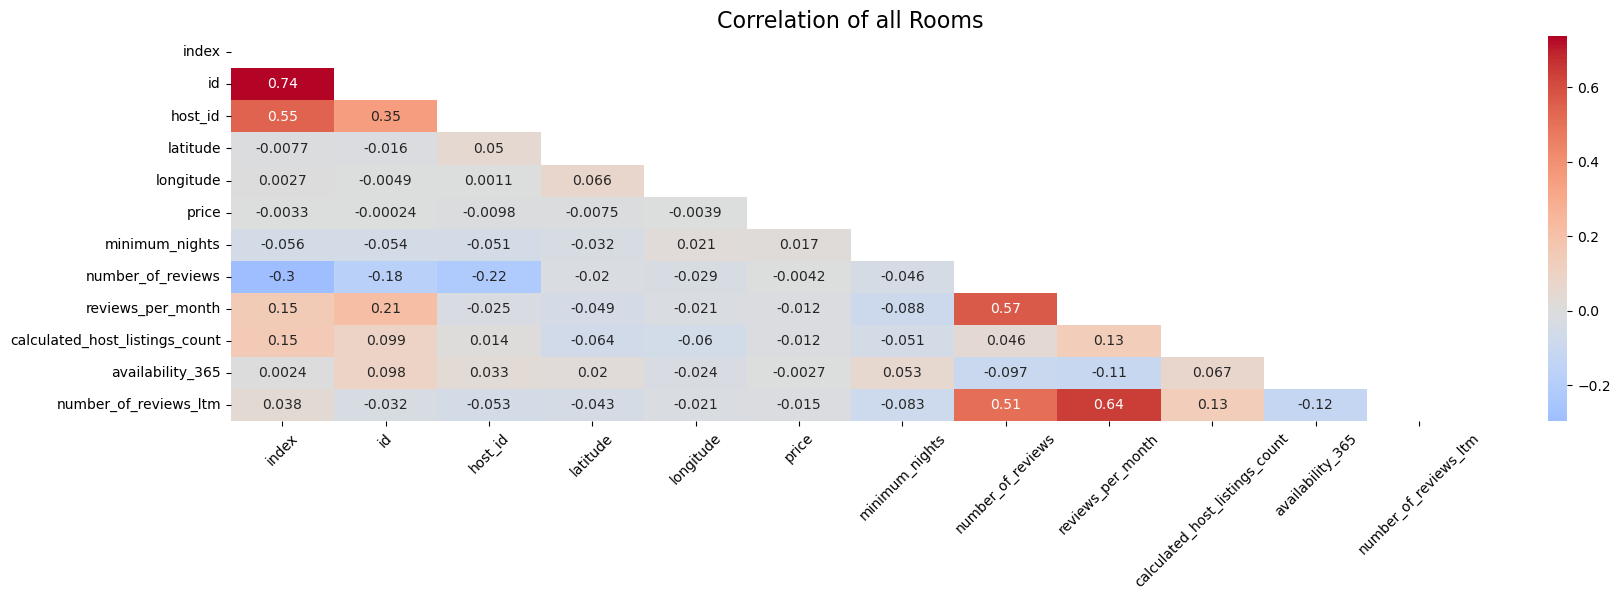

In [503]:
plt.figure(figsize=(20,5))

sns.heatmap(
    data= df.corr(),
    annot= True,
    cmap= 'coolwarm',
    center= 0,
    mask= np.triu(df_popular.corr())
)

plt.xticks(rotation= 45)

plt.title('Correlation of all Rooms', size= 16)

;

''

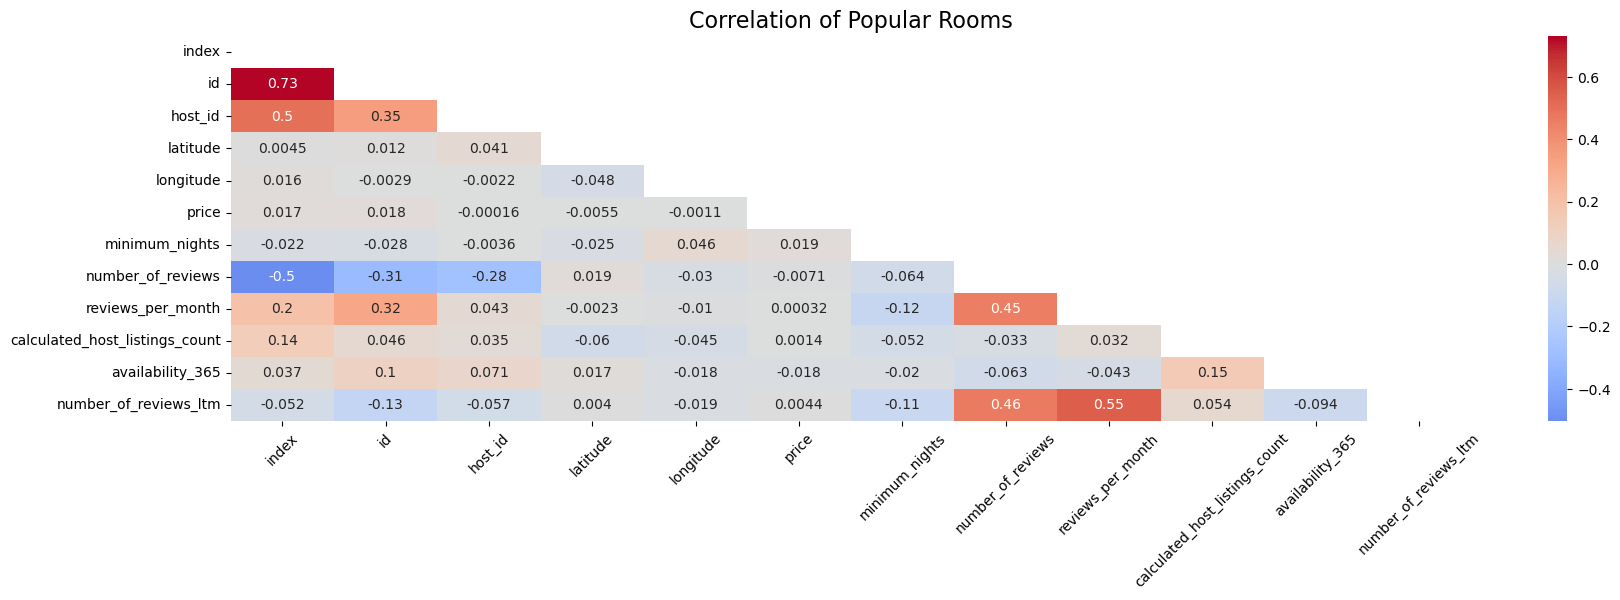

In [483]:
plt.figure(figsize=(20,5))

sns.heatmap(
    data= df_popular.corr(),
    annot= True,
    cmap= 'coolwarm',
    center= 0,
    mask= np.triu(df_popular.corr())
)

plt.xticks(rotation= 45)

plt.title('Correlation of Popular Rooms', size= 16)

;

Untuk rooms yang dianggap sebagai popular rooms, tidak dapat ditemukan korelasi yang kuat.

''

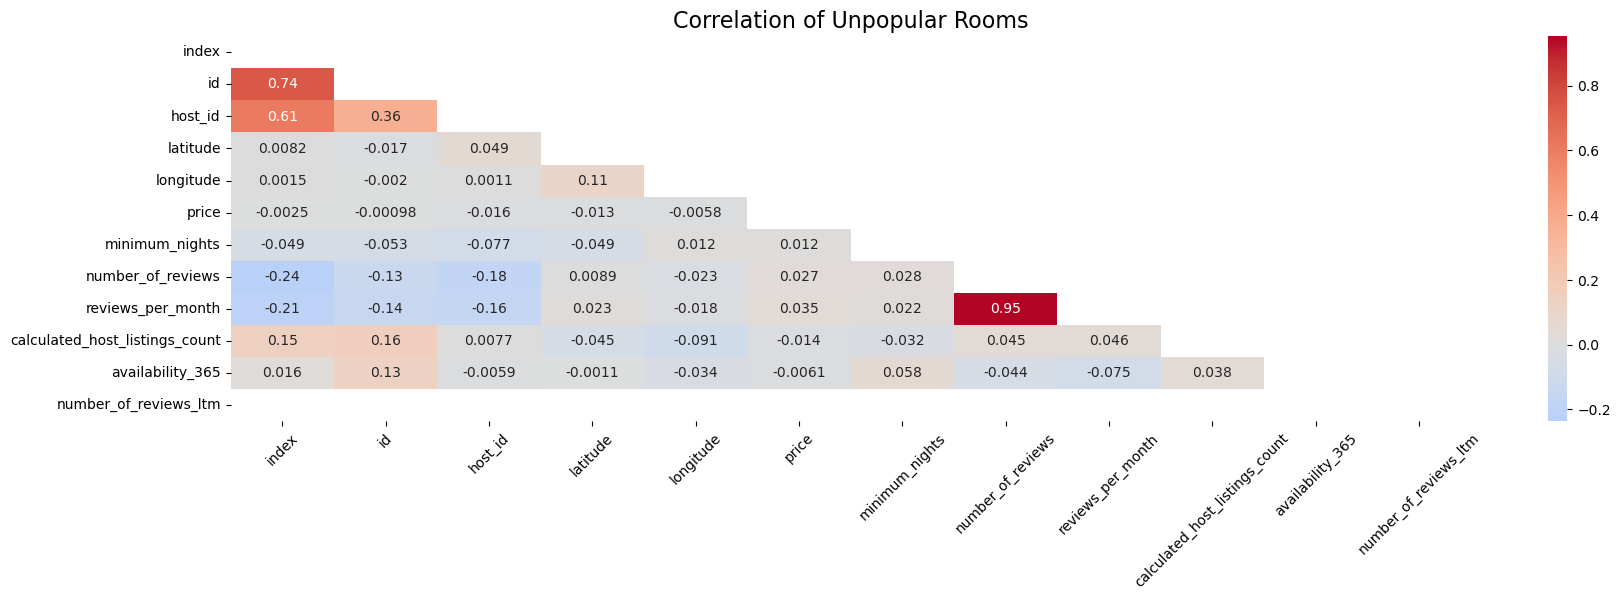

In [484]:
plt.figure(figsize=(20,5))

sns.heatmap(
    data= df_unpopular.corr(),
    annot= True,
    cmap= 'coolwarm',
    center= 0,
    mask= np.triu(df_unpopular.corr())
)

plt.xticks(rotation= 45)
plt.title('Correlation of Unpopular Rooms', size= 16)

;

number_of_review dengan reviews_per_month mempunyai korelasi yang sangat kuat.

## **No. of Reviews Given for Each Room Type**

Mencari room type apa yang paling popular dan diminati

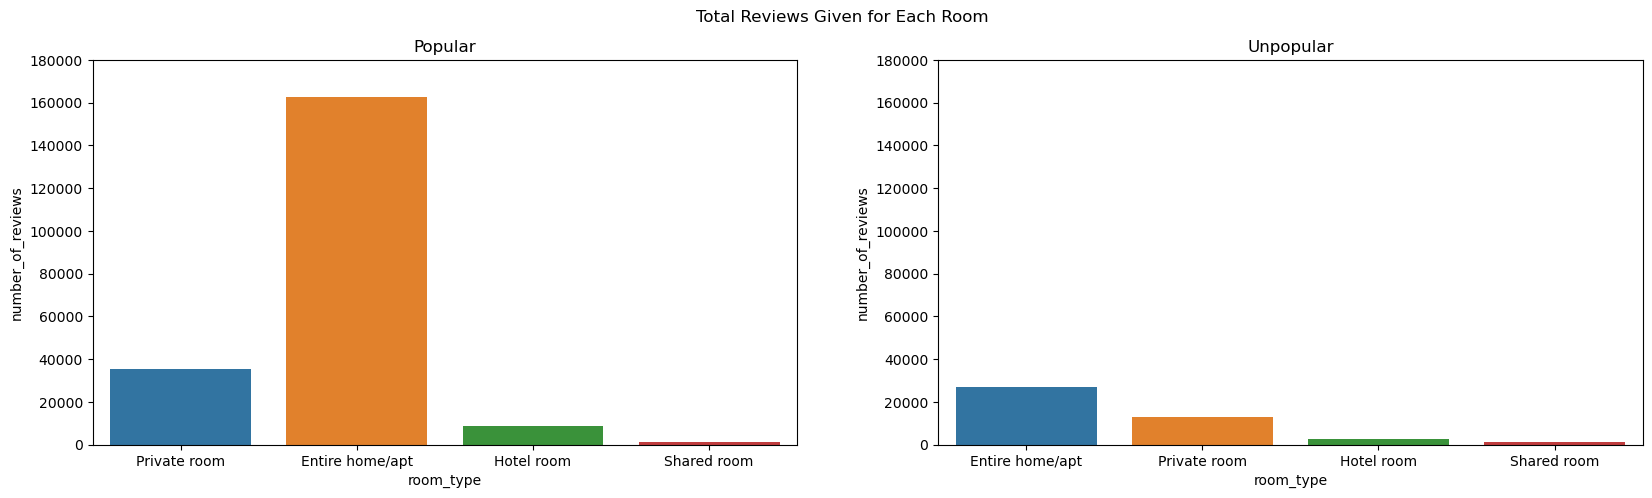

In [485]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(
    data= df_popular,
    x= 'room_type',
    y= 'number_of_reviews',
    estimator= np.sum,
    ci=0
)

plt.yticks(ticks= range(0,190000,20000))

plt.title('Popular')

plt.subplot(1,2,2)
sns.barplot(
    data= df_unpopular,
    x= 'room_type',
    y= 'number_of_reviews',
    estimator= np.sum,
    ci=0
)

plt.yticks(ticks= range(0,190000,20000))

plt.title('Unpopular')
plt.suptitle('Total Reviews Given for Each Room')

plt.show()

Grafik diatas menunjukkan bahwa baik di popular rooms maupun unpopular rooms, jenis room yang paling banyak diminati adalah entire home/apt

## **No of Rooms Popular vs Non-Popular in Each Neighbourhood**

Mencari proporsi antara popular rooms di suatu neighbourhood dengan rooms keseluruhan yang berada di neighbourhood tersebut

In [486]:
room_total = df_popular.groupby(by='neighbourhood').nunique()[['id']].sort_values('id',ascending= False).reset_index().rename(columns= {'id': 'pop_id'})

In [487]:
df_unpopular_sorted = df_unpopular.groupby(by='neighbourhood').nunique()[['id']].sort_values('id',ascending= False).reset_index().rename(columns= {'id': 'unpop_id'})

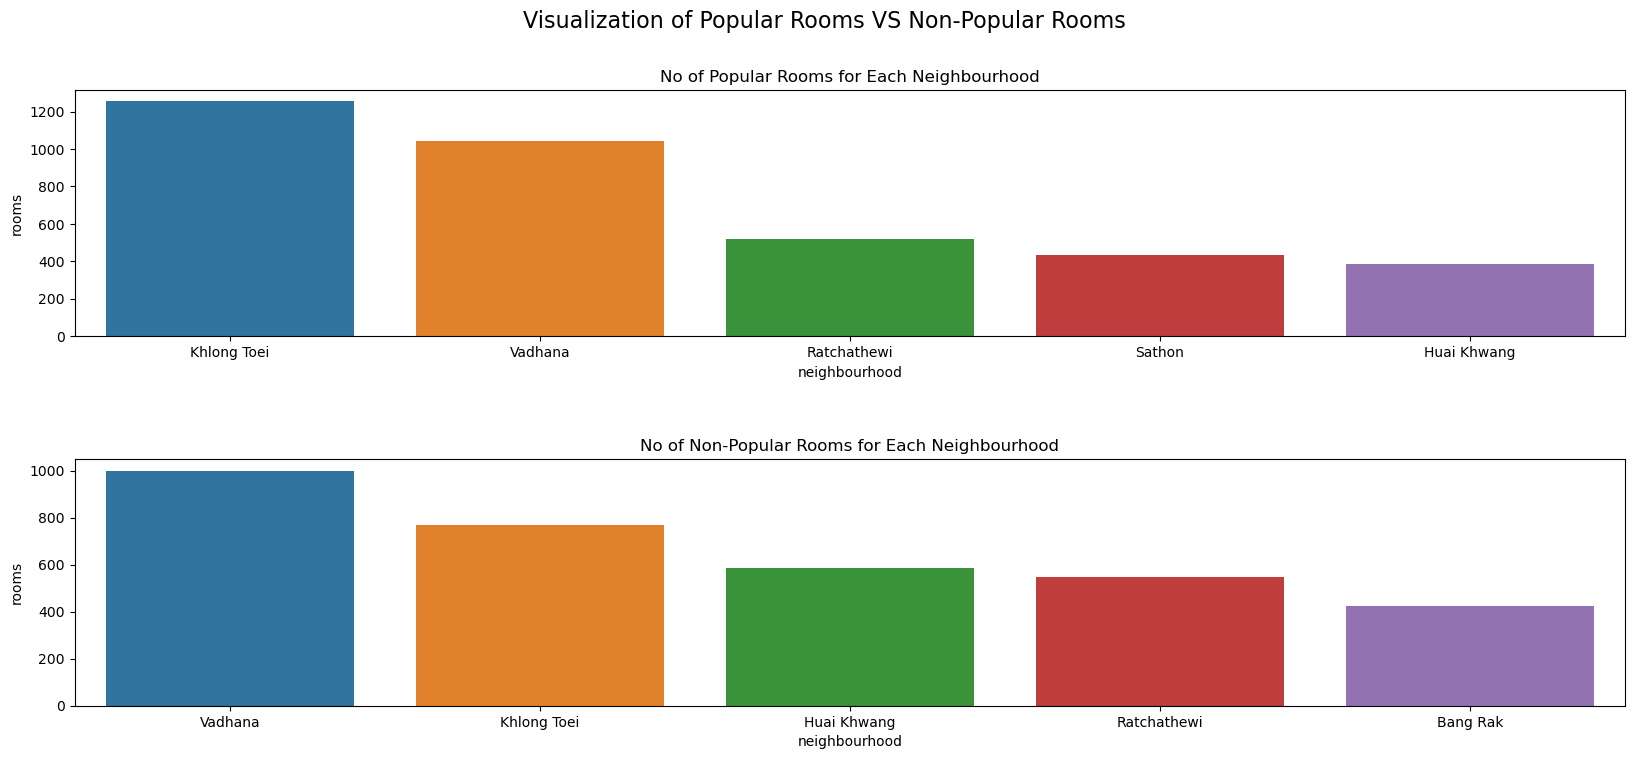

In [488]:
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(20,8))

sns.barplot(
    data= room_total.rename(columns= {'pop_id' : 'rooms'}).head(),
    x= 'neighbourhood',
    y= 'rooms',
    ax= ax_top
)

ax_top.set_title('No of Popular Rooms for Each Neighbourhood')
# ax_top.set_xticklabels(ax_top.get_xticklabels(), rotation= 90)

sns.barplot(
    data= df_unpopular_sorted.rename(columns= {'unpop_id' : 'rooms'}).head(),
    x= 'neighbourhood',
    y= 'rooms',
    ax= ax_bottom
)

ax_bottom.set_title('No of Non-Popular Rooms for Each Neighbourhood')
# ax_bottom.set_xticklabels(ax_bottom.get_xticklabels(), rotation= 90)


plt.suptitle('Visualization of Popular Rooms VS Non-Popular Rooms', size=16)
plt.subplots_adjust(hspace= 0.5)

plt.show()

### Percentage of Popular Rooms VS Total No. of Rooms

In [489]:
df_rooms_percentage = df_unpopular_sorted.merge(room_total, how='outer')
df_rooms_percentage['pop_percentage'] = (df_rooms_percentage['pop_id'] / (df_rooms_percentage['unpop_id'] + df_rooms_percentage['pop_id']) * 100).round(2)

df_rooms_percentage.sort_values(by='pop_percentage', ascending= False).head()

,neighbourhood,unpop_id,pop_id,pop_percentage
1,Khlong Toei,769,1254.0,61.99
7,Sathon,348,435.0,55.56
14,Parthum Wan,206,223.0,51.98
0,Vadhana,998,1043.0,51.10
3,Ratchathewi,546,518.0,48.68


Dalam 12 bulan terakhir, rooms yang paling popular berada di neighbourhood Khlong Toei. Karena mempunyai persentase popular rooms yang paling tinggi, walaupun jumlah rooms unpopular di neighbourhood tersebut jumlahnya tidak sedikit.

In [490]:
df_khlong_toei = df[df['neighbourhood'] == 'Khlong Toei']
df_khlong_toei_popular = df_khlong_toei[df_khlong_toei['number_of_reviews_ltm'] >= 1]
df_khlong_toei_unpopular = df_khlong_toei[df_khlong_toei['number_of_reviews_ltm'] < 1]

In [491]:
df_sathon = df[df['neighbourhood'] == 'Sathon']
df_sathon_popular = df_sathon[df_sathon['number_of_reviews_ltm'] >= 1]
df_sathon_unpopular = df_sathon[df_sathon['number_of_reviews_ltm'] < 1]

## **Popular Rooms Overview in Khlong Toei**

Berdasarkan grafik dan data sebelumnya, dapat dilihat bahwa Khlong Toei mempunyai persentase rooms yang diminati paling banyak

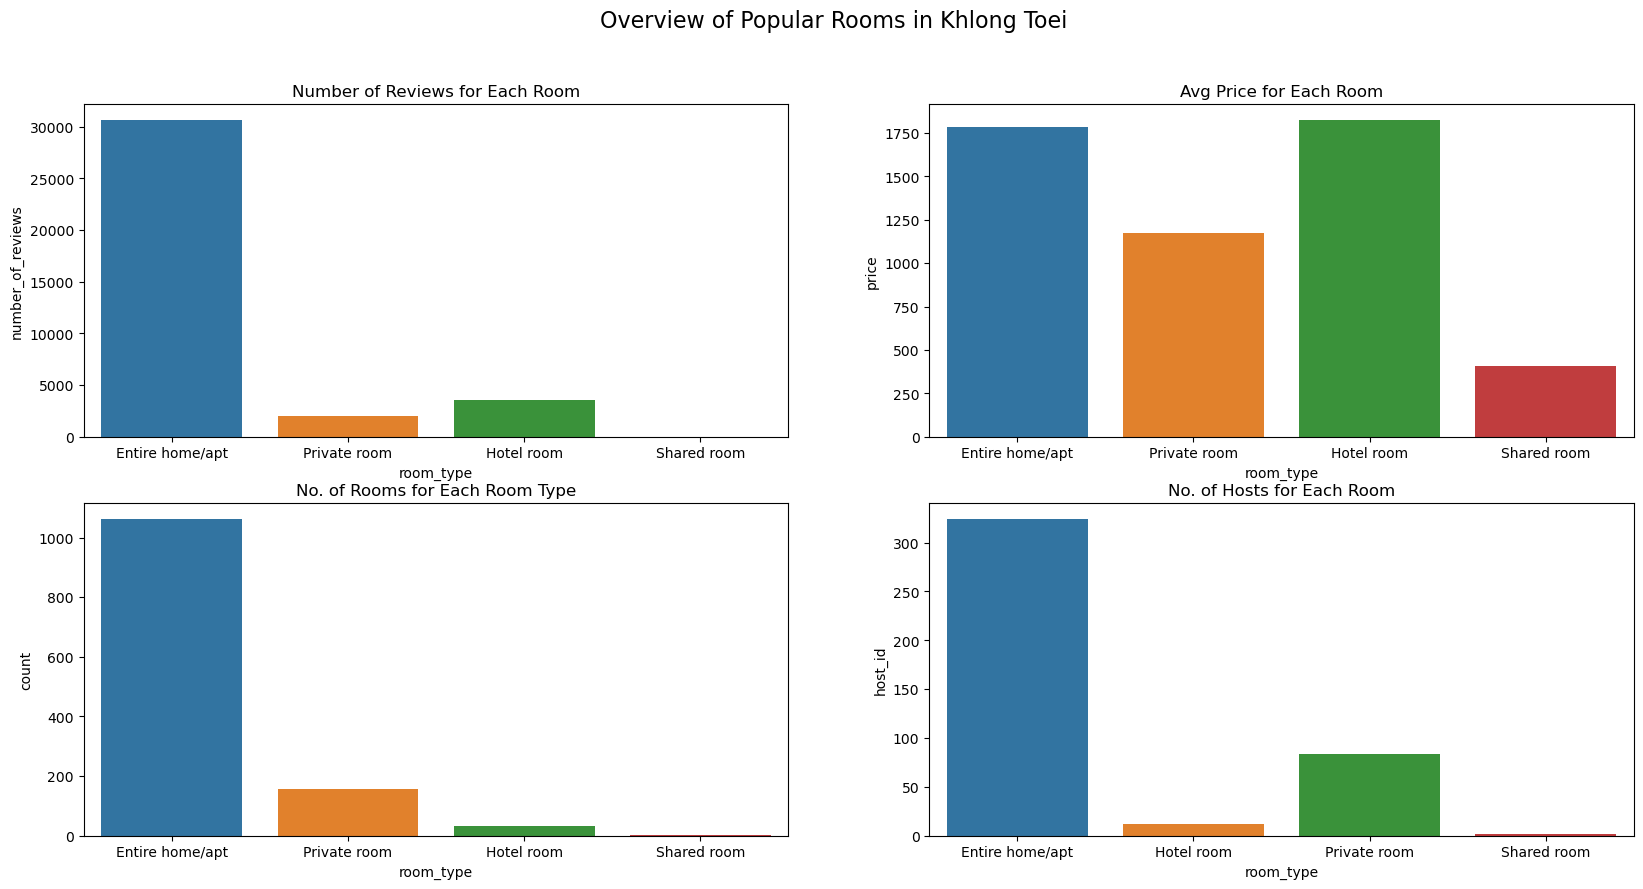

In [492]:
# avg reviews for room type in Khlong Toei
plt.figure(figsize=(20,9.5))

plt.subplot(2,2,1)
sns.barplot(
    data= df_khlong_toei_popular,
    x= 'room_type',
    y= 'number_of_reviews',
    estimator= sum,
    ci= 0
)

plt.title('Number of Reviews for Each Room')

plt.subplot(2,2,2)
sns.barplot(
    data= df_khlong_toei_popular,
    x= 'room_type',
    y= 'price',
    estimator= np.median,
    ci= 0
)

plt.title('Avg Price for Each Room')

plt.subplot(2,2,3)
sns.countplot(
    data= df_khlong_toei_popular,
    x= 'room_type',

)

plt.title('No. of Rooms for Each Room Type')

plt.subplot(2,2,4)
sns.barplot(
    data= df_khlong_toei_popular.groupby(by='room_type').nunique()[['host_id']].reset_index(),
    x= 'room_type',
    y= 'host_id'
)

plt.title('No. of Hosts for Each Room')

plt.suptitle('Overview of Popular Rooms in Khlong Toei', size= 16)

plt.show()


In [518]:
df_khlong_toei['number_of_reviews'].corr(df_khlong_toei['calculated_host_listings_count'])

0.035301933040269955

**Persentase room type entire home/apt disewakan lebih dari 1 kali**

In [493]:
len(df_khlong_toei_popular[(df_khlong_toei_popular['room_type'] == 'Entire home/apt') & (df_khlong_toei_popular['number_of_reviews'] > 1)]) / len(df_khlong_toei_popular[df_khlong_toei_popular['room_type'] == 'Entire home/apt']) * 100

92.74952919020716

In [519]:
df_khlong_toei_popular[((df_khlong_toei_popular['room_type'] == 'Entire home/apt')) & (df_khlong_toei_popular['number_of_reviews'] > 1)]

,index,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
63,65,320014,843854,Khlong Toei,13.728100,100.573180,Entire home/apt,1732,30,67,0.51,1,167,1
74,76,390611,807406,Khlong Toei,13.740520,100.552370,Entire home/apt,797,1,189,1.45,1,230,13
168,173,851956,4100838,Khlong Toei,13.704860,100.601520,Entire home/apt,850,21,33,0.28,3,294,1
172,177,1353517,7327298,Khlong Toei,13.723930,100.576470,Entire home/apt,3300,5,26,0.30,3,13,9
240,250,2542746,13020066,Khlong Toei,13.726350,100.572110,Entire home/apt,2123,3,210,1.98,3,294,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14609,15464,773772628992446102,487487340,Khlong Toei,13.721483,100.577876,Entire home/apt,1724,1,2,2.00,3,358,2
14636,15491,777056496452986612,471859999,Khlong Toei,13.736520,100.560040,Entire home/apt,6114,1,2,2.00,3,43,2
14651,15508,774531405786833372,480534455,Khlong Toei,13.724963,100.565792,Entire home/apt,1575,1,3,3.00,14,348,3
14734,15591,783092802312135579,66923696,Khlong Toei,13.715680,100.590490,Entire home/apt,929,1,2,2.00,48,343,2


In [535]:
df_khlong_toei_popular['price'].median()

2285.8923444976076

''

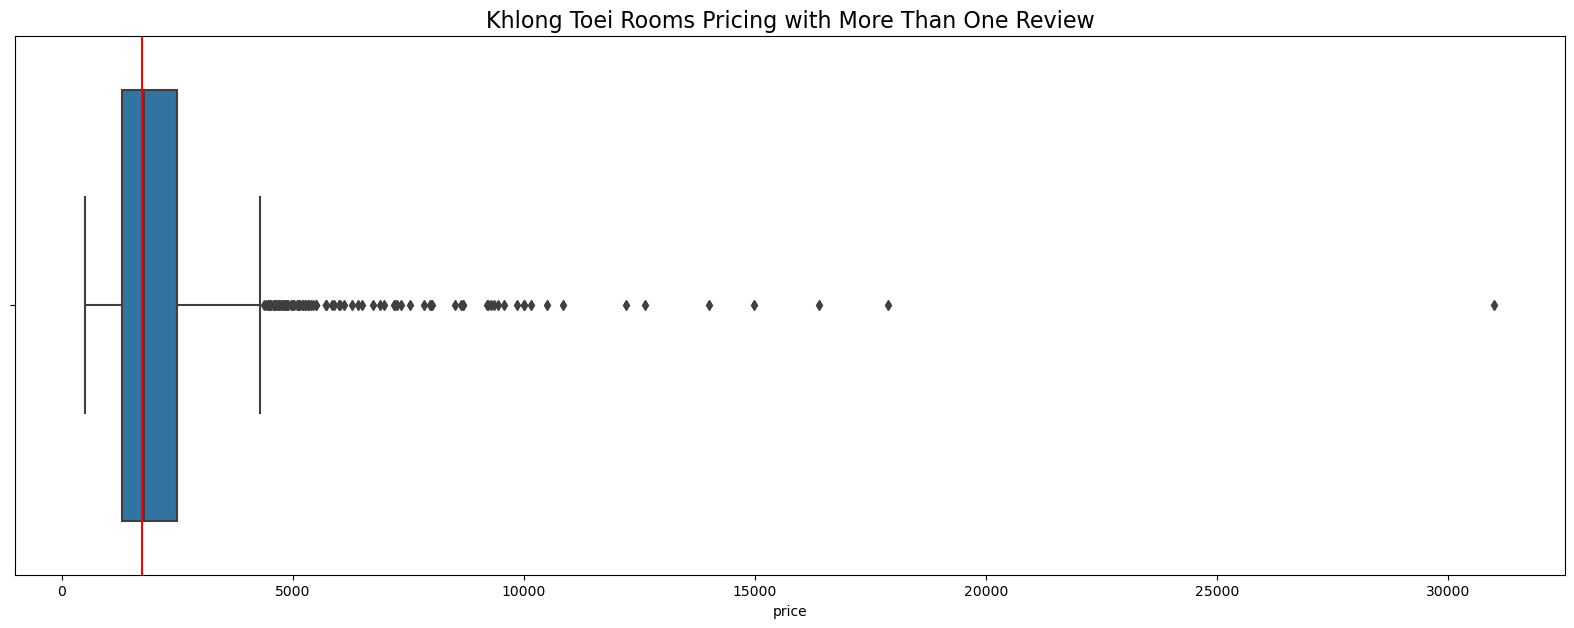

In [540]:
plt.figure(figsize=(20,5))

sns.boxplot(
    data= df_khlong_toei_popular[((df_khlong_toei_popular['room_type'] == 'Entire home/apt')) & (df_khlong_toei_popular['number_of_reviews'] > 1)],
    x= 'price'
    
)

plt.axvline(x= (df_khlong_toei_popular['price'].median()), color= 'red')
plt.title('Khlong Toei Rooms Pricing with More Than One Review', size= 16)

;

''

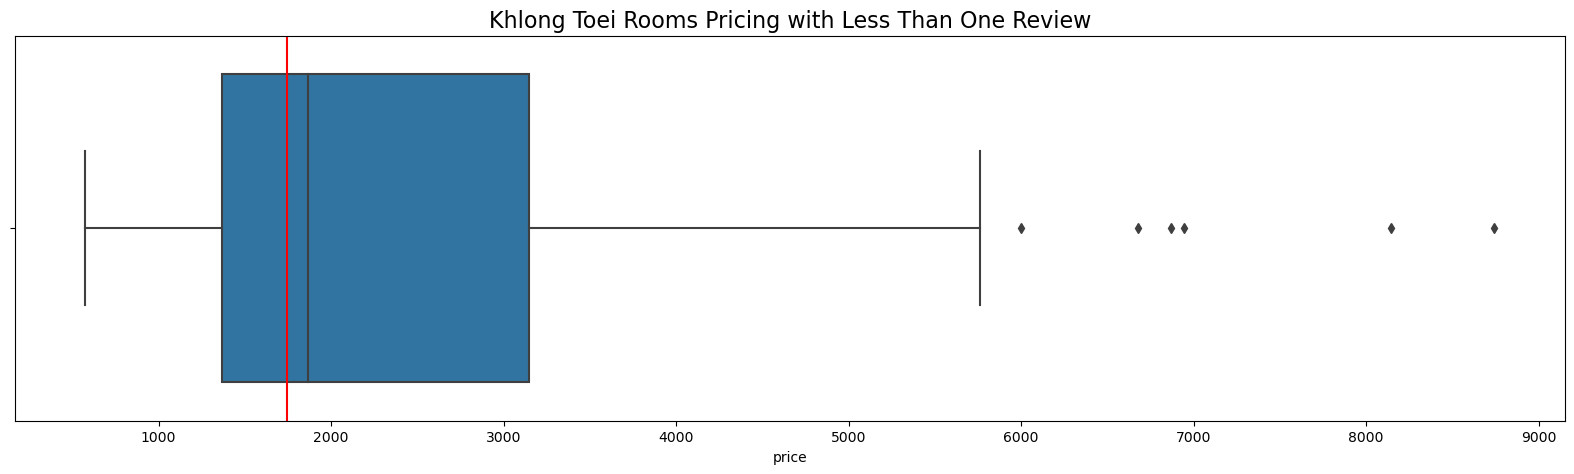

In [542]:
plt.figure(figsize=(20,5))

sns.boxplot(
    data= df_khlong_toei_popular[((df_khlong_toei_popular['room_type'] == 'Entire home/apt')) & (df_khlong_toei_popular['number_of_reviews'] <= 1)],
    x= 'price'
    
)

plt.axvline(x= (df_khlong_toei_popular['price'].median()), color= 'red')
plt.title('Khlong Toei Rooms Pricing with Less Than One Review', size= 16)
;

Salah satu penyebab terjadinya traffic yang tinggi adalah karena rata-rata nilai price berada di bawah rata-rata dari price seluruh listing yang berada di Khlong Toei.

## **Unpopular Rooms Overview in Khlong Toei**

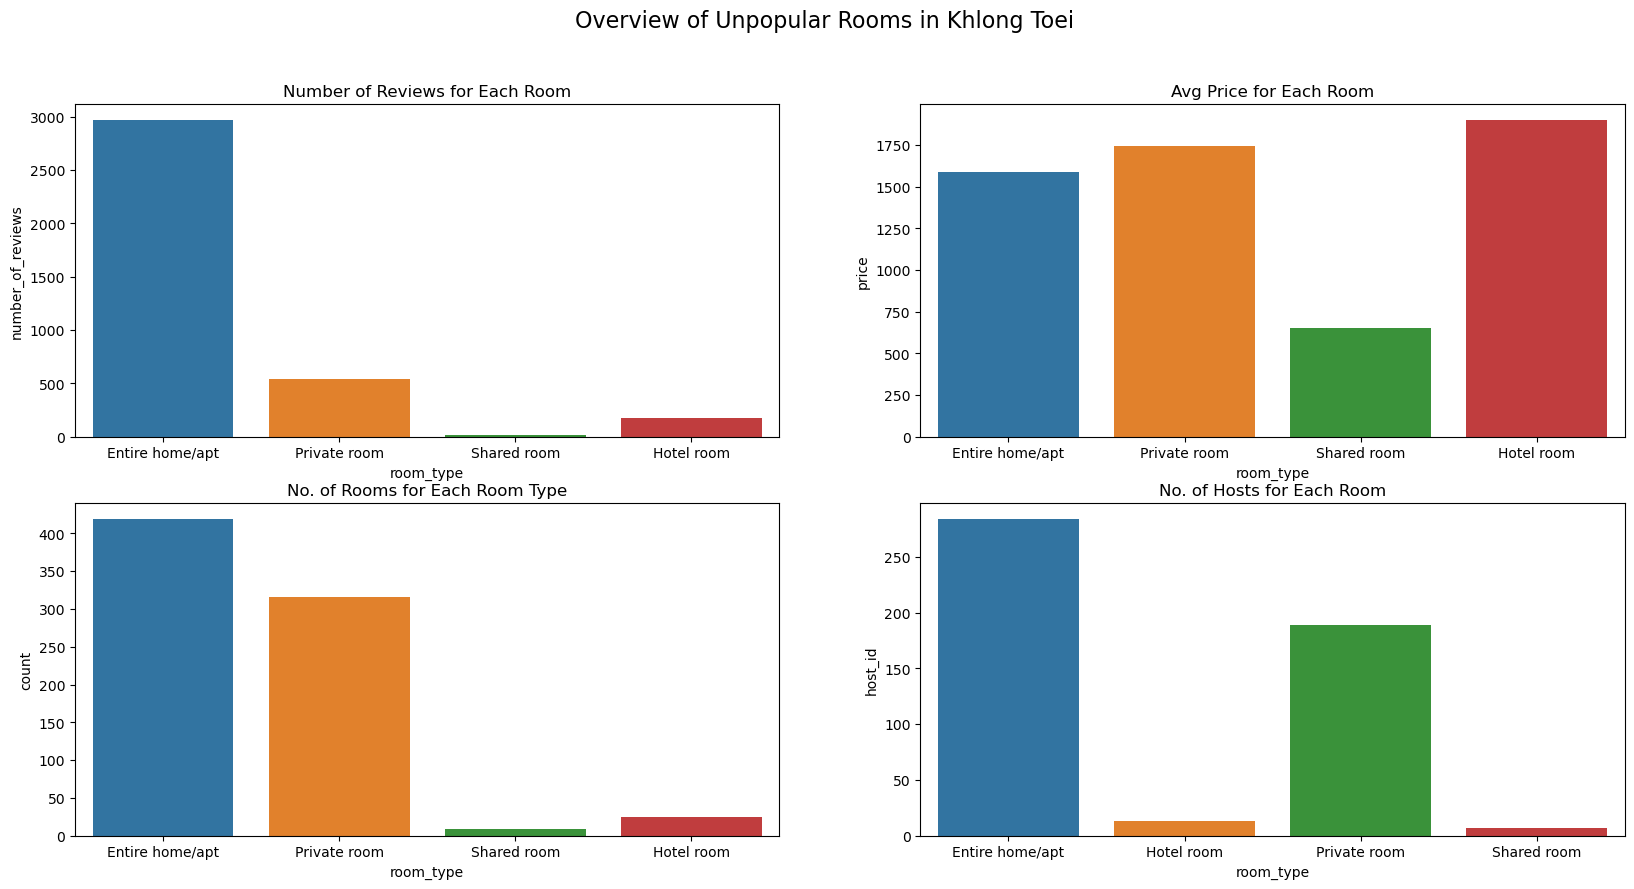

In [494]:
# avg reviews for room type in Khlong Toei
plt.figure(figsize=(20,9.5))

plt.subplot(2,2,1)
sns.barplot(
    data= df_khlong_toei_unpopular,
    x= 'room_type',
    y= 'number_of_reviews',
    estimator= sum,
    ci= 0
)

plt.title('Number of Reviews for Each Room')

plt.subplot(2,2,2)
sns.barplot(
    data= df_khlong_toei_unpopular,
    x= 'room_type',
    y= 'price',
    estimator= np.median,
    ci= 0
)

plt.title('Avg Price for Each Room')

plt.subplot(2,2,3)
sns.countplot(
    data= df_khlong_toei_unpopular,
    x= 'room_type',

)

plt.title('No. of Rooms for Each Room Type')

plt.subplot(2,2,4)
sns.barplot(
    data= df_khlong_toei_unpopular.groupby(by='room_type').nunique()[['host_id']].reset_index(),
    x= 'room_type',
    y= 'host_id'
)

plt.title('No. of Hosts for Each Room')

plt.suptitle('Overview of Unpopular Rooms in Khlong Toei', size= 16)

plt.show()

## **Popular Rooms Overview in Sathon**

Berdasarkan grafik dan data sebelumnya, dapat dilihat bahwa Sathon mempunyai persentase rooms yang diminati kedua paling banyak

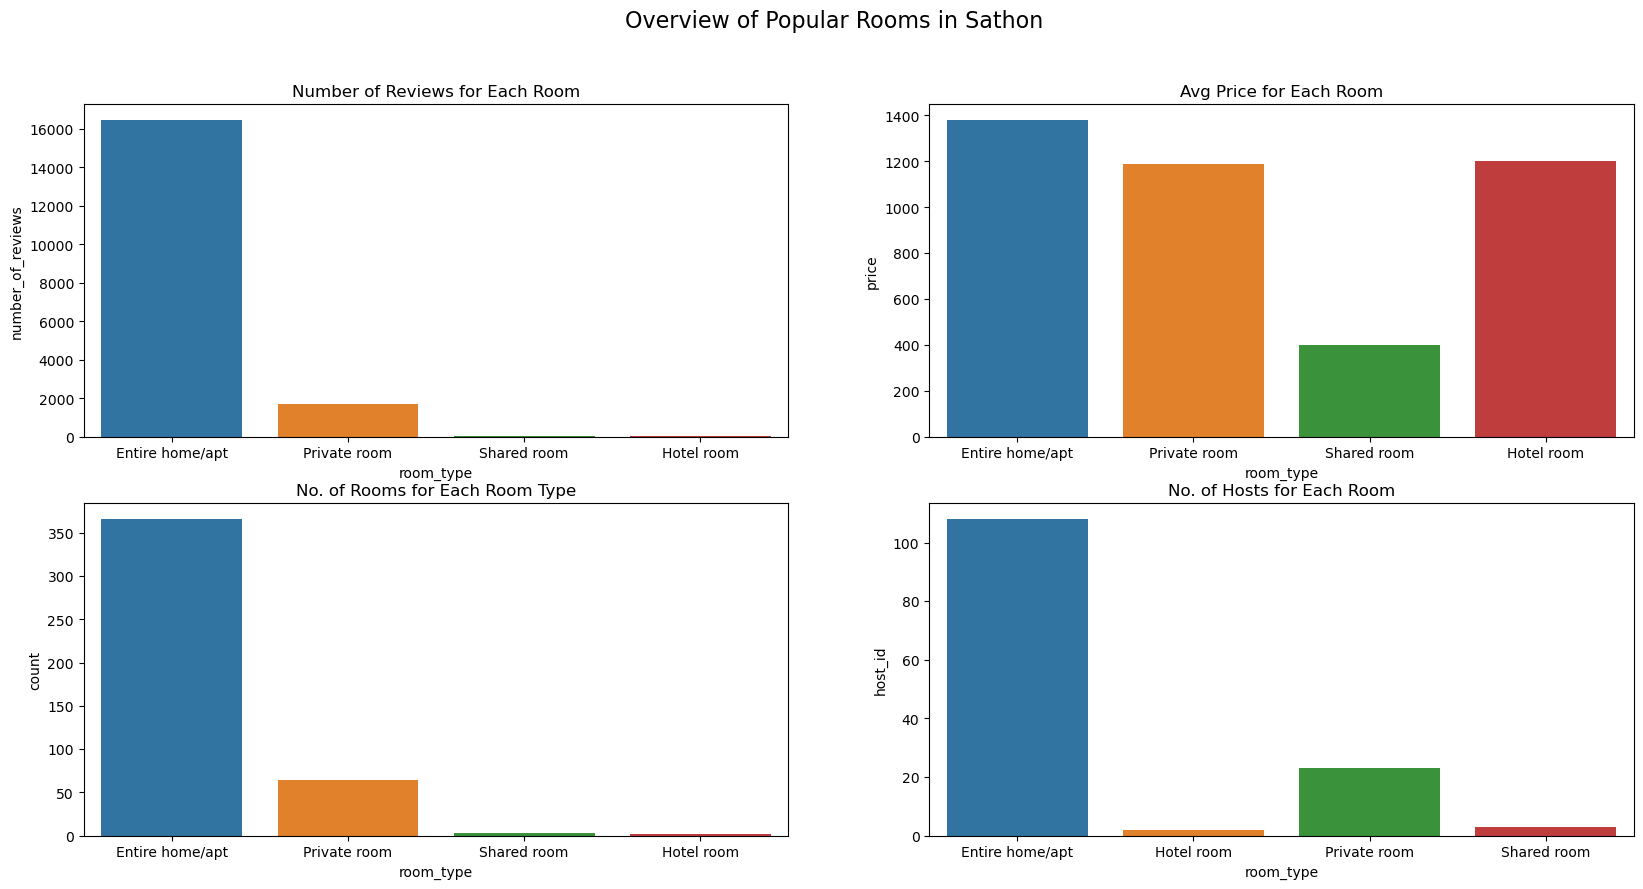

In [495]:
# avg reviews for room type in Sathon
plt.figure(figsize=(20,9.5))

plt.subplot(2,2,1)
sns.barplot(
    data= df_sathon_popular,
    x= 'room_type',
    y= 'number_of_reviews',
    estimator= sum,
    ci= 0
)

plt.title('Number of Reviews for Each Room')

plt.subplot(2,2,2)
sns.barplot(
    data= df_sathon_popular,
    x= 'room_type',
    y= 'price',
    estimator= np.median,
    ci= 0
)

plt.title('Avg Price for Each Room')

plt.subplot(2,2,3)
sns.countplot(
    data= df_sathon_popular,
    x= 'room_type',

)

plt.title('No. of Rooms for Each Room Type')

plt.subplot(2,2,4)
sns.barplot(
    data= df_sathon_popular.groupby(by='room_type').nunique()[['host_id']].reset_index(),
    x= 'room_type',
    y= 'host_id'
)

plt.title('No. of Hosts for Each Room')

plt.suptitle('Overview of Popular Rooms in Sathon', size= 16)

plt.show()

**Persentase rooms disewakan lebih dari 1 kali**

In [496]:
len(df_sathon_popular[(df_sathon_popular['room_type'] == 'Entire home/apt') & (df_sathon_popular['number_of_reviews'] > 1)]) / len(df_sathon_popular[df_sathon_popular['room_type'] == 'Entire home/apt']) * 100

89.07103825136612

''

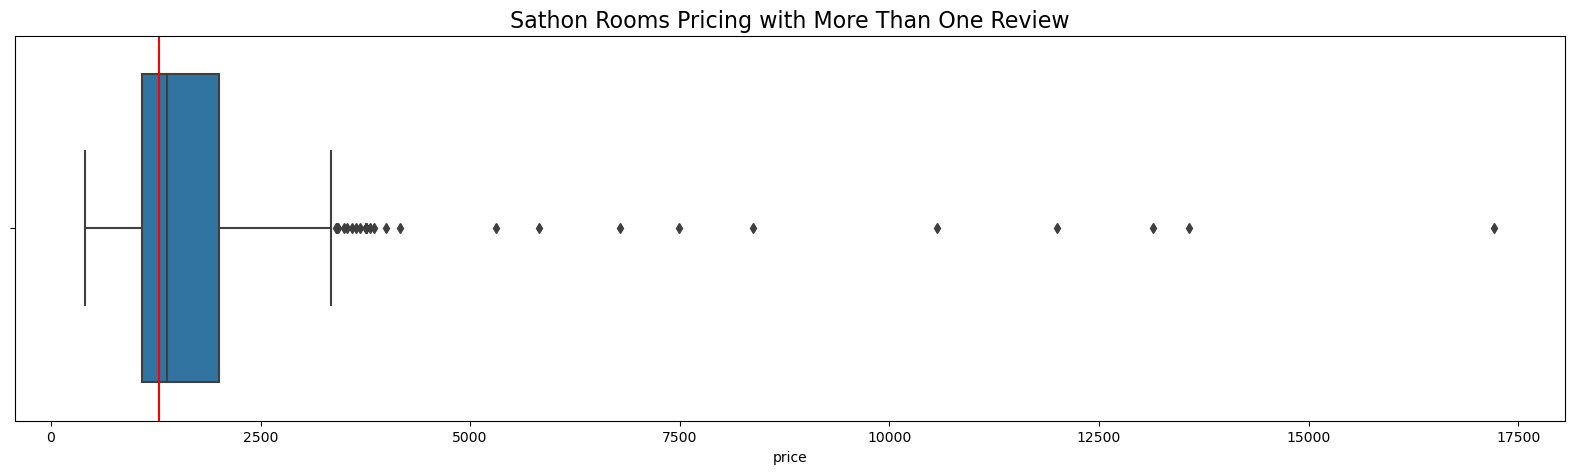

In [543]:
plt.figure(figsize=(20,5))

sns.boxplot(
    data= df_sathon_popular[((df_sathon_popular['room_type'] == 'Entire home/apt')) & (df_sathon_popular['number_of_reviews'] > 1)],
    x= 'price'
    
)

plt.axvline(x= (df_sathon_popular['price'].median()), color= 'red')
plt.title('Sathon Rooms Pricing with More Than One Review', size= 16)

;

''

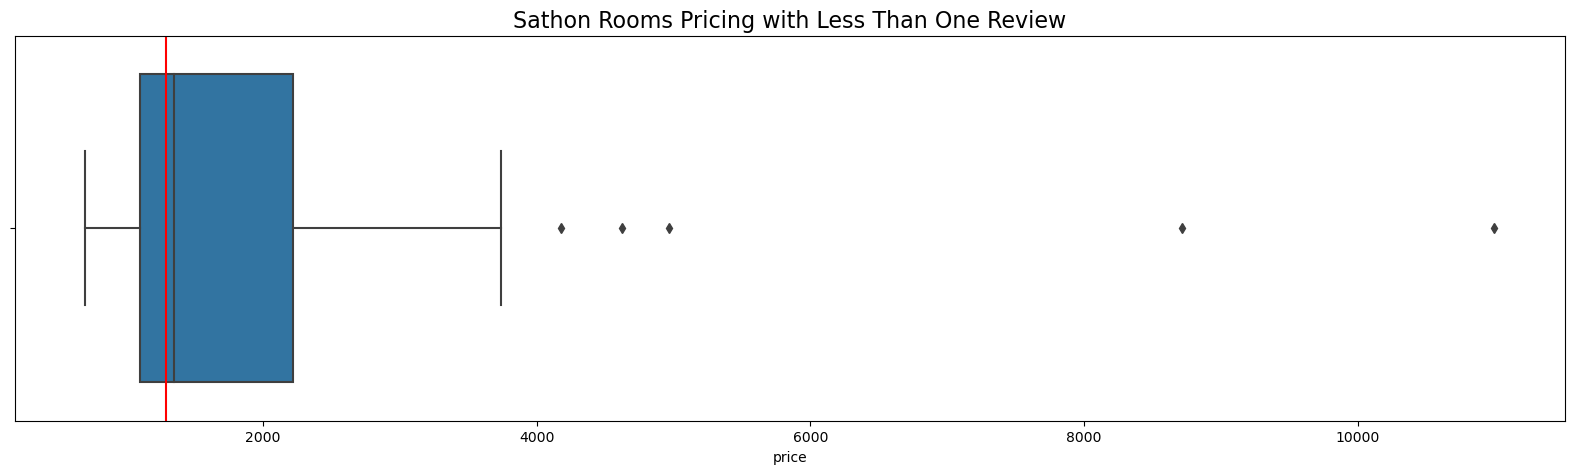

In [544]:
plt.figure(figsize=(20,5))

sns.boxplot(
    data= df_sathon_popular[((df_sathon_popular['room_type'] == 'Entire home/apt')) & (df_sathon_popular['number_of_reviews'] <= 1)],
    x= 'price'
    
)

plt.axvline(x= (df_sathon_popular['price'].median()), color= 'red')
plt.title('Sathon Rooms Pricing with Less Than One Review', size= 16)
;

Berdasarkan grafik diatas, dapat dilihat bahwa listing dengan harga yang lebih mahal, cenderung untuk termasuk ke dalam listing popular di Sathon namun tidak mempunyai banyak reviews.

## **Avg Reviews for Each Neighbourhood**

Mencari rentang dari popular reviews setiap neighbourhood selama listing di neighbourhood tersebut di listing

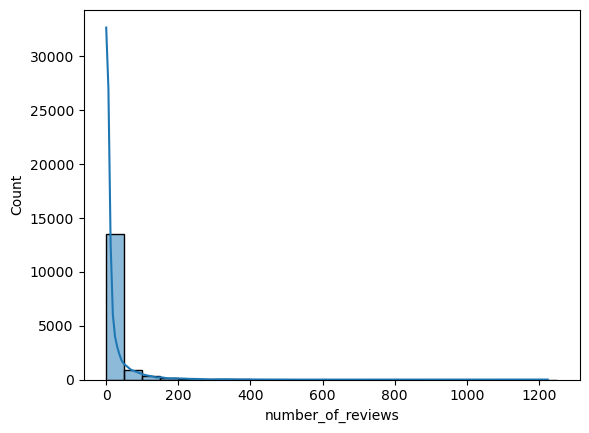

In [497]:
sns.histplot(data=df, x= 'number_of_reviews', binwidth= 50, kde= True);

Karena distribusi tidak normal, pakai median

In [498]:
df_ranked_by_neighbourhood_review = df.groupby(by='neighbourhood').median()[['number_of_reviews']].sort_values(by='number_of_reviews', ascending= False).head(10)
df_ranked_by_neighbourhood_review

,number_of_reviews
neighbourhood,
Khlong Toei,6.0
Pom Prap Sattru Phai,5.0
Phaya Thai,4.0
Sathon,4.0
Bang Rak,3.0
Ratchathewi,3.0
Bang Kho laen,2.0
Phra Khanong,2.0
Bang Na,2.0


Berdasarkan grafik diatas, dapat dilihat bahwa no. of reviews yang diberikan untuk Khlong Toei termasuk dalam top 10 terbesar. Hal ini berarti bahwa 

## **Avg Price for Each Neighbourhood**

Mencari rentang price dari setiap neighbourhood

In [499]:
df_ranked = df_popular.drop(df_popular[df_popular['price'] > 100000].index)

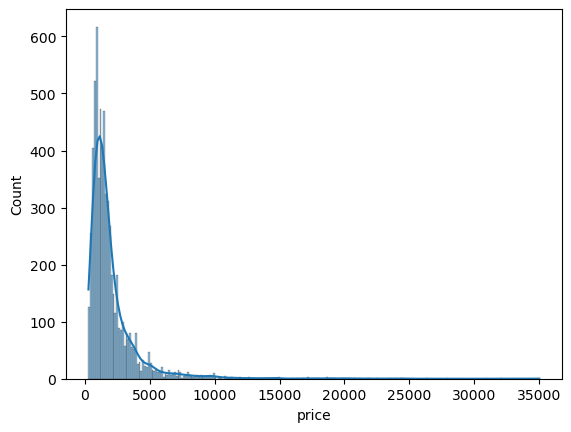

In [500]:
sns.histplot(data= df_ranked, x= 'price', kde= True);

Karena distribusi tidak normal, pakai median

In [501]:
df_ranked_by_neighbourhood_price = df_ranked.groupby(by='neighbourhood').median()[['price']].sort_values(by='price', ascending= False).head(10)
df_ranked_by_neighbourhood_price

,price
neighbourhood,
Lat Phrao,2721.5
Parthum Wan,2650.0
Bang Rak,1909.0
Vadhana,1888.0
Thawi Watthana,1800.0
Khlong Sam Wa,1750.0
Khlong Toei,1745.0
Saphan Sung,1559.0
Ratchathewi,1529.0


Berdasarkan tabel diatas, dapat dilihat bahwa Khlong Toei banyak diminati karena mempunyai rata-rata harga yang tidak terlalu tinggi diantara top 10 neighbourhood dengan price tertinggi

**Average Price Entire home/apt**

In [502]:
df_popular_entirehome = df_popular[df_popular['room_type'] == 'Entire home/apt']

df_popular_entirehome.groupby(by= 'neighbourhood').median()[['price']].sort_values(by= 'price', ascending= False).head(20)

,price
neighbourhood,
Sai Mai,4000.0
Lat Phrao,3000.0
Parthum Wan,2995.0
Saphan Sung,2549.0
Dusit,2379.0
Bang Rak,2175.0
Bang Khun thain,2057.0
Vadhana,2006.5
Khlong Toei,1786.5


# **Conclusion**

- **Dataset:**
    - Berdasarkan data dari airbnb listings di Bangkok, ditemukan bahwa terdapat banyak NaN atau missing values pada data. Data dengan missing values tersebut mencapai 30% dari total keseluruhan data. Sehingga apabila dihilangkan, hasil analisa dapat terpengaruhi secara signifikan. Sama halnya dengan outlier atau anomali pada data, dimana data-data tersebut mencapai persentase yang tinggi dari keseluruhan data. Agar hasil analisa tidak terpengaruhi secara signifikan, outlier tersebut tetap diperlukan untuk analisa.
    - Karena di dalam data tidak terdapat banyaknya customers, maka kolom number_of_reviews dapat diartikan sebagai banyaknya customer atau traffic yang dimiliki oleh listing tersebut.
    - Sebuah listing dapat dikatakan sebagai listing yang popular apabila mempunyai nilai pada kolom number_of_reviews_ltm lebih dari atau sama dengan 1.
    <br><br>

- **Neighbourhood:**
    - Grafik pada bagian number of popular room vs unpopular room in each neighbourhood, memperlihatkan bahwa Khlong Toei dan Vadhana mempunyai angka dengan popular rooms paling tinggi. Namun unpopular rooms pada kedua neighbourhood tersebut juga tinggi.
    - Sehingga dicari persentase antara rooms yang popular dengan total rooms keseluruhan pada kedua neighbourhood. Sehingga diperoleh bahwa Khlong Toei mempunyai persentase paling tinggi yaitu 62% dan Sathon sebesar 56%.
    - Sehingga dapat diasumsikan bahwa Khlong Toei adalah neighbourhood dengan tingkat popularity paling tinggi.
    <br><br>


- **Room Type:**
    - Apabila dilihat dari room type secara keseluruhan, room type yang banyak diminati adalah entire home/apt.
    - Pada neighbourhood Khlong Toei, room type yang paling diminati adalah entire home/apt.
    - Hal yang sama juga terjadi pada neighbourhood Sathon, dimana room type yang paling popular adalah entire home/apt.
    - Terjadinya peminatan terhadap entire home/apt bisa disebabkan oleh karena harga yang dimiliki oleh entire home/apt mirip dengan hotel room.
    <br><br>


- **Price:**
    - Berdasarkan grafik average price for each neighbourhood dapat dilihat bahwa Khlong Toei termasuk ke dalam average dengan posisi yang cukup rendah
    - Sedangkan untuk neighbourhood Sathon, average price tidak termasuk ke dalam top 10 average price termahal.
    <br><br>


- **No. of Host:**
    - Walaupun terdapat banyak host dengan room type entire home/apt, dapat dilihat bahwa persentase terjadinya penyewaan lebih dari 1 kali adalah sebanyak 92%. Sehingga dapat dikatakan bahwa kemungkinan terjadinya penyewaan sangatlah tinggi.
    - Di neighbourhood Sathon juga menunjukkan persentase yang tinggi, dimana nilai nya mencapai 89%.

# **Reccomendation**

Sebaiknya properti yang di listing berada di neighbourhood Khlong Toei, karena:

- Sebaiknya room type yang di investasikan adalah entire home/apt karena penyewa menunjukkan peminatan yang tinggi terhadap ruangan tersebut.
- Harga sewa yang room yang banyak diminati adalah sekitar 1786.5 untuk entire home/apt.
- Kalau dilihat dari peta, sebaiknya properti yang di investasikan berada di neighbourhood Khlong Toei dengan letak yang sedikit ke barat dan sedikit ke utara.

Kalau listing tidak bisa ditempatkan di Khlong Toei, maka opsi kedua adalah di neighbourhood Sathon, karena:
- Tingkat popularity tidak sebesar 56%
- Room type yang sebaiknya disewakan juga entire home/ apt dengan harga sekitar 1380